# Relatório de análise dos dados de um restaurante

## Dados obtidos neste relatório

### Dia da semana
Foi verificado que no domingo as pessoas as pessoas gastam mais no restaurante, e também dão uma média maior de gorjetas, porém a maior gorjeta recebida foi durante um sábado, no valor de 10 reais.
### Horário
Foi verificado que durante o jantar mais pessoas frequentam o restaurante, e também que o valor da conta e a gorjeta são maiores durante esse período. A maior gorjeta recebida, no valor de 10 reais, foi no perído do jantar.
### Sobremesa
Foi verificado que pedidos com sobremesa possuem uma média de valor da conta maior, possuem o mesmo valor de gorjeta dos pedidos sem sobremesa, e as mesas que não pediram sobremesa tinham mais pessoas. Também é possível verificar que a maior gorjeta foi dada numa mesa que pediu sobremesa.
### Valores
- Maior valor de conta: 55,80 reais
- Menor valor de conta: 2,80 reais


- Maior valor de gorjeta: 10 reais
- Menor valor de gorjeta: 0,77 reais


In [50]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ranksums

In [51]:
#importando os dados
dados = pd.read_csv('tips_atualizado.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [52]:
# verificando a existência de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  3416 non-null   float64
 1   tip         3416 non-null   float64
 2   dessert     3416 non-null   object 
 3   day         3416 non-null   object 
 4   time        3416 non-null   object 
 5   size        3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


#### Podemos notar que não existem entradas nulas

In [53]:
# descrevendo os dados
dados.describe()

,total_bill,tip,size
count,3416.000000,3416.000000,3416.000000
mean,19.824368,2.711189,2.569672
std,8.984716,1.078789,0.949288
min,2.799644,0.766203,1.000000
25%,13.388590,1.919737,2.000000
50%,17.800015,2.549192,2.000000
75%,24.331401,3.292833,3.000000
max,55.804318,10.000000,6.000000


In [54]:
# mudando os nomes das colunas para português
dados = dados.rename(columns = {'total_bill':'valor_conta','tip':'gorjeta','dessert':'sobremesa',
                                'day':'dia_da_semana','time':'hora','size':'quantidade_de_pessoas'})
dados

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora,quantidade_de_pessoas
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [55]:
# verificando os dados da coluna sobremesa
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [56]:
# mudando a linguagem dos dados da coluna sobremesa
dados.sobremesa = dados.sobremesa.map({'No':'Não','Yes':'Sim'})
dados

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora,quantidade_de_pessoas
0,16.990000,1.010000,Não,Sun,Dinner,2
1,10.340000,1.660000,Não,Sun,Dinner,3
2,21.010000,3.500000,Não,Sun,Dinner,3
3,23.680000,3.310000,Não,Sun,Dinner,2
4,24.590000,3.610000,Não,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sat,Dinner,3
3412,25.531567,1.604021,Sim,Sat,Dinner,2
3413,21.547132,1.733914,Sim,Sat,Dinner,2
3414,18.966233,1.718951,Não,Sat,Dinner,2


In [57]:
# verificando os dados da coluna dia da semana
dados['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [58]:
# mudando a linguagem dos dados da coluna dia da semana
dados['dia_da_semana'] = dados['dia_da_semana'].map({'Sun':'Domingo','Sat':'Sábado','Thur':'Quinta','Fri':'Sexta'})
dados

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora,quantidade_de_pessoas
0,16.990000,1.010000,Não,Domingo,Dinner,2
1,10.340000,1.660000,Não,Domingo,Dinner,3
2,21.010000,3.500000,Não,Domingo,Dinner,3
3,23.680000,3.310000,Não,Domingo,Dinner,2
4,24.590000,3.610000,Não,Domingo,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Dinner,3
3412,25.531567,1.604021,Sim,Sábado,Dinner,2
3413,21.547132,1.733914,Sim,Sábado,Dinner,2
3414,18.966233,1.718951,Não,Sábado,Dinner,2


In [59]:
# verificando os dados da coluna hora
dados.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [60]:
# mudando a linguagem dos dados da coluna hora
dados.hora = dados.hora.map({'Dinner':'Jantar','Lunch':'Almoço'})
dados

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora,quantidade_de_pessoas
0,16.990000,1.010000,Não,Domingo,Jantar,2
1,10.340000,1.660000,Não,Domingo,Jantar,3
2,21.010000,3.500000,Não,Domingo,Jantar,3
3,23.680000,3.310000,Não,Domingo,Jantar,2
4,24.590000,3.610000,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,Não,Sábado,Jantar,3
3412,25.531567,1.604021,Sim,Sábado,Jantar,2
3413,21.547132,1.733914,Sim,Sábado,Jantar,2
3414,18.966233,1.718951,Não,Sábado,Jantar,2


### Agora que os dados estão prontos, vamos as análises

# Análise 1 - Dia da semana

In [61]:
media_por_dia = dados.groupby(['dia_da_semana'])['valor_conta'].mean()
media_por_dia

dia_da_semana
Domingo    21.439133
Quinta     17.724088
Sexta      17.215616
Sábado     20.480249
Name: valor_conta, dtype: float64

### Pode-se notar que domingo possui a maior média, tendo diferença de menos de 1 real para sábado, mas de um valor maior para quinta e sexta

<AxesSubplot:xlabel='dia_da_semana', ylabel='valor_conta'>

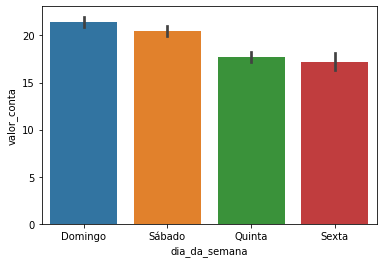

In [62]:
# visualizando por meio de um gráfico
sns.barplot(x = 'dia_da_semana', y = 'valor_conta', data = dados)

### Visualmente também é possível notar que domingo possui a maior média dentre os dias analisados

## Verificando o valor da gorjeta por dia da semana

In [63]:
# verificando a media de gorjetas por dia da semana
dados.groupby(['dia_da_semana'])['gorjeta'].mean()

dia_da_semana
Domingo    2.902079
Quinta     2.556177
Sexta      2.549960
Sábado     2.690114
Name: gorjeta, dtype: float64

### Pode-se observar que domingo possui a maior média de gorjetas

In [64]:
# verificando a maior gorjeta por dia da semana
dados.groupby(['dia_da_semana'])['gorjeta'].max()

dia_da_semana
Domingo     6.50
Quinta      6.70
Sexta       4.73
Sábado     10.00
Name: gorjeta, dtype: float64

### Pode-se observar que sábado possui a maior gorjeta recebida

In [65]:
dados.groupby(['dia_da_semana'])['gorjeta'].min()

dia_da_semana
Domingo    0.911648
Quinta     1.049906
Sexta      0.918138
Sábado     0.766203
Name: gorjeta, dtype: float64

### Pode-se observar que sábado também possui a menor gorjeta recebida

## Verificando o valor da conta e as gorjetas por dia da semana

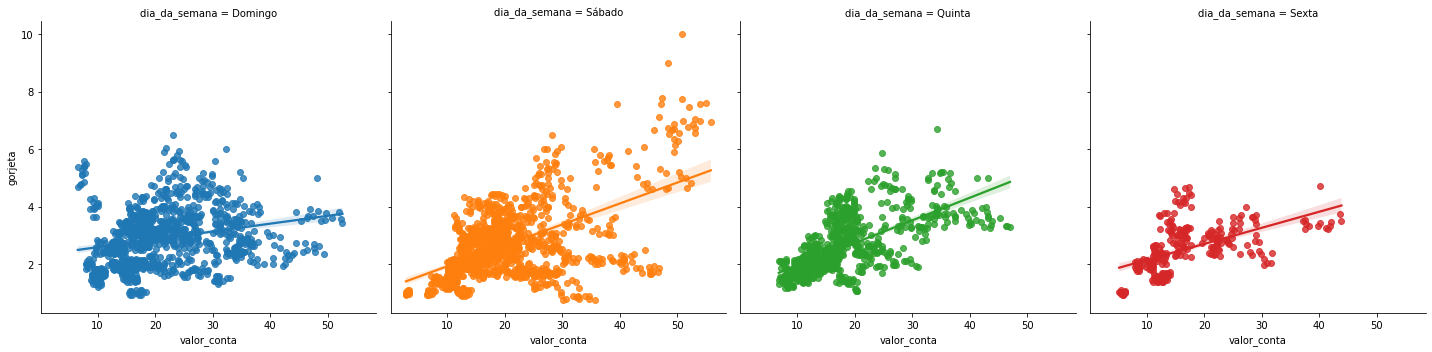

In [66]:
sns.lmplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = dados)

### Pode-se notar que sábado possui as gorjetas mais altas, e que quanto maior a conta maior a gorjeta recebida

# Análise 2 - Horário

## Verificando o valor da conta e da gorjeta por horário

In [67]:
dados.groupby(['hora'])[['valor_conta','gorjeta']].mean()

,valor_conta,gorjeta
hora,,
Almoço,17.213913,2.534495
Jantar,20.832954,2.779458


### Pode-se observar que o valor da conta no jantar é maior do que o valor da conta no almoço, e que também o valor da gorjeta é maior no jantar

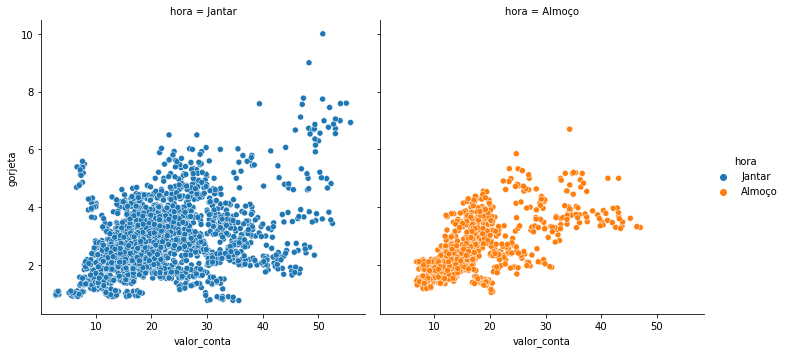

In [68]:
# visualizando em um gráfico
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'hora', col = 'hora', data = dados)

### Visualmente pode-se notar que as gorjetas e o valor da conta do jantar são maiores que as do almoço, também nota-se que existem mais registros de jantar do que almoço, então deve-se verificar se isso é verdade

In [69]:
# verificando a quantidade de entradas do almoço
dados.query('hora == "Almoço"').count()

valor_conta              952
gorjeta                  952
sobremesa                952
dia_da_semana            952
hora                     952
quantidade_de_pessoas    952
dtype: int64

In [70]:
# verificando a quantidade de entradas do jantar
dados.query('hora == "Jantar"').count()

valor_conta              2464
gorjeta                  2464
sobremesa                2464
dia_da_semana            2464
hora                     2464
quantidade_de_pessoas    2464
dtype: int64

### Foi verificado e realmente possuem muito mais entradas de jantar do que de almoço no restaurante

# Análise 3 - Sobremesa

## Verificando a relação da sobremesa com as gorjetas e valor total da conta

In [71]:
# verificando os valores dos pedidos com sobremesa
dados.query('sobremesa == "Sim"')[['valor_conta','gorjeta','quantidade_de_pessoas']].mean()

valor_conta              20.800076
gorjeta                   2.710137
quantidade_de_pessoas     2.408602
dtype: float64

In [72]:
# verificando os valores dos pedidos sem sobremesa
dados.query('sobremesa == "Não"')[['valor_conta','gorjeta','quantidade_de_pessoas']].mean()

valor_conta              19.223436
gorjeta                   2.711837
quantidade_de_pessoas     2.668874
dtype: float64

In [73]:
dados.groupby(['sobremesa'])[['valor_conta', 'gorjeta']].min()

,valor_conta,gorjeta
sobremesa,,
Não,6.533329,0.910509
Sim,2.799644,0.766203


In [74]:
dados.groupby(['sobremesa'])[['valor_conta', 'gorjeta']].max()

,valor_conta,gorjeta
sobremesa,,
Não,53.091371,9.0
Sim,55.804318,10.0


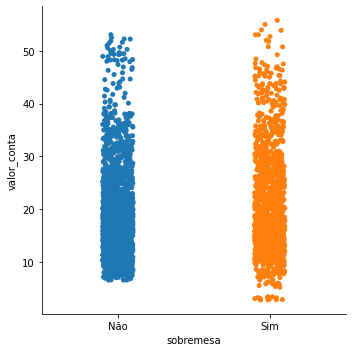

In [75]:
# visualizando em um gráfico 
sns.catplot(x = 'sobremesa', y = 'valor_conta', data = dados)

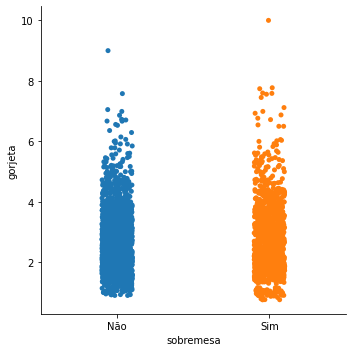

In [76]:
# visualizando em um gráfico 
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = dados)

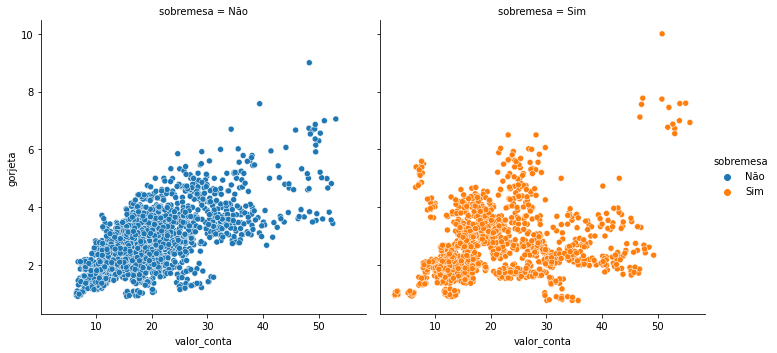

In [77]:
# visualizando em um gráfico
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = dados)

## Teste de Hipótese

**H<sup>null</sup>**
>**O valor da gorjeta dos pedidos com sobremesa é igual ao valor da gorjeta dos pedidos sem sobremesa**

**H<sup>alt</sup>**
>**O valor da gorjeta dos pedidos com sobremesa é diferente do valor da gorjeta dos pedidos sem sobremesa**

In [82]:
sem_sobremesa = dados.query('sobremesa == "Não"')['gorjeta']
sem_sobremesa

0       1.010000
1       1.660000
2       3.500000
3       3.310000
4       3.610000
          ...   
3407    1.149254
3410    3.555939
3411    4.729032
3414    1.718951
3415    2.812176
Name: gorjeta, Length: 2114, dtype: float64

In [83]:
com_sobremesa = dados.query('sobremesa == "Sim"')['gorjeta']
com_sobremesa

56      3.000000
58      1.760000
60      3.210000
61      2.000000
62      1.980000
          ...   
3406    2.967175
3408    1.044625
3409    0.882144
3412    1.604021
3413    1.733914
Name: gorjeta, Length: 1302, dtype: float64

In [85]:
r = ranksums(sem_sobremesa, com_sobremesa)
r

RanksumsResult(statistic=1.1968664568074376, pvalue=0.23135861017527193)

In [86]:
print('O valor do pvalue é {}'.format(r.pvalue))

O valor do pvalue é 0.23135861017527193


### Como o pvalue é maior que 0.05, considera-se a hipótese nula, então as gorjetas dos pedidos com e sem sobremesa são iguais

### É possível notar que os pedidos com sobremesa possuem uma média de valor da conta maior, possuem o mesmo valor de gorjeta dos pedidos sem sobremesa, e as mesas que não pediram sobremesa tinham mais pessoas. Também é possível verificar que a maior gorjeta foi dada numa mesa que pediu sobremesa